In [1]:
import pandas as pd
import csv
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/gpt-4.csv',nrows=3000,on_bad_lines = 'skip')
df.head(10)

,data,conversation
0,This 60-year-old male was hospitalized due to ...,"Doctor: Good morning, how are you feeling toda..."
1,A 39-year-old man was hospitalized due to an i...,"Doctor: Hello, how are you feeling today?\nPat..."
2,One week after a positive COVID-19 result this...,"Doctor: Hello, how are you feeling today?\nPat..."
3,This 69-year-old male was admitted to the ICU ...,"Doctor: Hello, how are you feeling today?\nPat..."
4,This 57-year-old male was admitted to the ICU ...,"Doctor: Good morning, how are you feeling toda..."
5,This 52-year-old male tested COVID-19 positive...,"Doctor: Good morning, how are you feeling toda..."
6,Paramedics found this 59-year-old female with ...,"Doctor: Hello, how are you feeling today?\nPat..."
7,This 33-year-old female patient had typical CO...,"Doctor: Hi there, how are you feeling today?\n..."
8,This 66-year-old male patient was admitted to ...,"Doctor: Good morning, how are you feeling toda..."
9,A 66-year-old male started to present symptoms...,"Doctor: Hi, how are you feeling today?\nPatien..."


In [4]:
dfdata = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data_heading.csv')

In [ ]:
dfdata.head()

,processed_heading
0,a woman suffer a left pontine hypertensive hem...
1,case a dominant female undergo the first carpo...
2,a hispanic male who previously work as a nurse...
3,a male intact steenbok weigh kg be present at ...
4,a male patient with a history of diabetes mell...


In [ ]:
print(df['data'].head())

0    This 60-year-old male was hospitalized due to ...
1    A 39-year-old man was hospitalized due to an i...
2    One week after a positive COVID-19 result this...
3    This 69-year-old male was admitted to the ICU ...
4    This 57-year-old male was admitted to the ICU ...
Name: data, dtype: object


age
55.0    52
65.0    50
60.0    48
53.0    46
64.0    45
        ..
1.0      3
95.0     2
92.0     2
96.0     1
94.0     1
Name: count, Length: 96, dtype: int64
age_group
0-10     127
10-20    215
20-30    309
30-40    331
40-50    366
50-60    406
60-70    405
70-80    289
80-90     95
90+       17
Name: count, dtype: int64


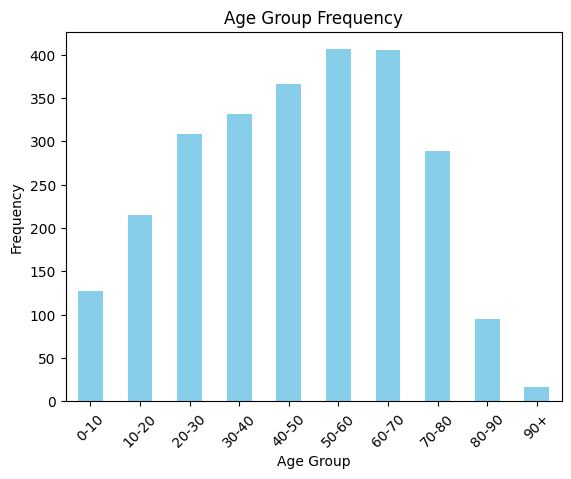

In [5]:
import re
def extract_age(text):
    match = re.search(r'(\d+)-year-old', text)
    return int(match.group(1)) if match else None

# Apply the function to the 'text' column to create a new 'age' column
df['age'] = df['data'].apply(extract_age)

# Count frequency of each age group
age_counts = df['age'].value_counts()

# Print age frequencies
print(age_counts)

# Plot age distribution
bins = [0, 10, 20, 30, 40, 50, 60,70,80,90,100]
labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70','70-80','80-90','90+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)
age_group_counts = df['age_group'].value_counts().sort_index()
print(age_group_counts)

age_group_counts.plot(kind='bar', color='skyblue')
plt.title('Age Group Frequency')
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()



covid_related
False    2954
True       46
Name: count, dtype: int64


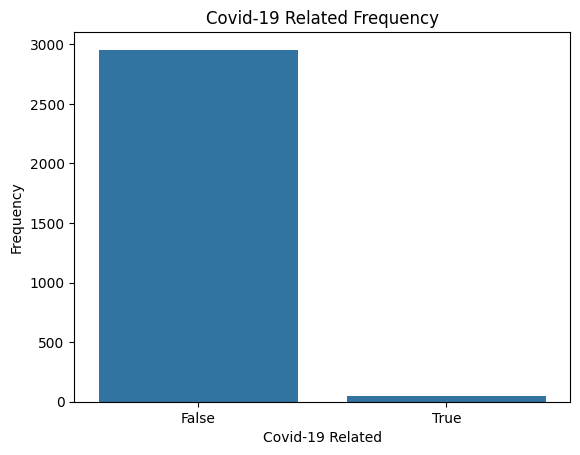

In [6]:
def extract_covid(text):
    text = str(text).lower()
    match = re.search(r'covid-19', text)
    return True if match else False
df['covid_related'] = df['data'].apply(extract_covid)
covid_counts = df['covid_related'].value_counts()
print(covid_counts)

sns.barplot(x=covid_counts.index, y=covid_counts.values)
plt.title('Covid-19 Related Frequency')
plt.xlabel('Covid-19 Related')
plt.ylabel('Frequency')
plt.show()

In [7]:
import spacy
from spacy.matcher import PhraseMatcher

# Load a generic English SpaCy model
nlp = spacy.load("en_core_web_sm")

# Define symptom patterns
symptom_patterns = [
    "intermittent symptom",
    "palatal myoclonus",
    "rapid click or pop sound",
    "back of my throat",
    "sudden change in symptoms",
    "new symptom",
    "fever", "dry cough","dyspnea",
    "headache","nausea", "dizziness", "fatigue",
    "shortness of breath", "chills",
    "vomiting", "sore throat", "diarrhea",
    "chest pain", "muscle aches", "swelling",
    "weight loss", "joint pain", "abdominal pain",
    "sweating", "rash", "difficulty breathing", "loss of appetite",
    "coughing up blood", "blurry vision", "confusion", "numbness",
    "tingling", "stomach cramps",
    "hemorrhage", "seizure", "sleep disturbances"
]

def extract_symptoms(conversation):
    symptoms = [symptom for symptom in symptom_patterns if symptom in conversation.lower()]
    return ', '.join(symptoms) if symptoms else "None"

# Add a new column for symptoms
df['data_symptoms'] = df['data'].apply(extract_symptoms)
df['conversation_symptoms'] = df['conversation'].apply(extract_symptoms)

df= df.dropna(subset=['data_symptoms'])
df = df.dropna(subset=['conversation_symptoms'])
# Display the DataFrame with the new symptoms column
print(df['data_symptoms'])
print(df['conversation_symptoms'])

0          fever, dry cough, dyspnea
1          fever, dry cough, dyspnea
2                            dyspnea
3                          dry cough
4          fever, dry cough, dyspnea
                    ...             
2995                            None
2996                            None
2997                  abdominal pain
2998    swelling, sweating, numbness
2999                            None
Name: data_symptoms, Length: 3000, dtype: object
0       fever, dry cough, dyspnea, difficulty breathing
1                             fever, dry cough, dyspnea
2                                                  None
3                                             dry cough
4                             fever, dry cough, dyspnea
                             ...                       
2995                                               None
2996                                               None
2997                                     abdominal pain
2998                       swelling, swe

In [8]:
all_data_symptoms = df['data_symptoms'].str.split(', ').explode().dropna()
all_conversation_symptoms = df['conversation_symptoms'].str.split(', ').explode().dropna()

data_symptom_counts = all_data_symptoms.value_counts()
conversation_symptom_counts = all_conversation_symptoms.value_counts()

# Display the most common symptoms
print(data_symptom_counts,conversation_symptom_counts)

data_symptoms
None                    1268
fever                    529
abdominal pain           345
swelling                 273
vomiting                 264
headache                 232
nausea                   224
weight loss              200
dyspnea                  189
chest pain               170
rash                     161
fatigue                  154
diarrhea                 144
shortness of breath      129
hemorrhage               111
seizure                  109
chills                    98
numbness                  73
dizziness                 51
dry cough                 42
joint pain                41
confusion                 39
loss of appetite          30
sweating                  23
tingling                  18
blurry vision             15
sore throat               14
muscle aches               8
difficulty breathing       6
sleep disturbances         4
new symptom                2
palatal myoclonus          2
Name: count, dtype: int64 conversation_symptoms
None      

In [10]:
!pip install dash

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 48.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 16.1 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  Attempting uninstall: Flask
    Found existing installation: Flask 3.1.0
    Uninstalling Flask-3.1.0:
      Successfully uninstalled Flask-3.1.0


In [19]:
import dash
import plotly.express as px
import plotly.graph_objs as go
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import pandas as pd

# Comprehensive Data Analysis
total_conversations = len(df)
unique_data_symptoms = df['data_symptoms'].unique()
unique_conversation_symptoms = df['conversation_symptoms'].unique()

# Symptom Frequency Analysis
all_data_symptoms = df['data_symptoms'].str.split(', ').explode().dropna()
all_conversation_symptoms = df['conversation_symptoms'].str.split(', ').explode().dropna()

data_symptom_counts = all_data_symptoms.value_counts()
conversation_symptom_counts = all_conversation_symptoms.value_counts()

# Age Group and COVID Analysis
age_covid_crosstab = pd.crosstab(df['age_group'], df['covid_related'])

# Color Palette
colors = {
    'background': '#F0F4F8',
    'text': '#1A365D',
    'primary': '#3182CE',
    'secondary': '#4FD1C5'
}

# Initialize Dash App
app = dash.Dash(__name__)

# Advanced Layout with Modern Design
app.layout = html.Div([
    # Header
    html.Div([
        html.H1("Medical Insights Dashboard",
                style={
                    'textAlign': 'center',
                    'color': colors['text'],
                    'backgroundColor': colors['secondary'],
                    'padding': '20px',
                    'borderRadius': '10px'
                })
    ]),

    # Summary Cards
    html.Div([
        html.Div([
            html.H3("Total Conversations", style={'color': colors['primary']}),
            html.P(str(total_conversations), style={'fontSize': '24px', 'fontWeight': 'bold'})
        ], style={
            'backgroundColor': '#E6F2FF',
            'padding': '15px',
            'borderRadius': '10px',
            'textAlign': 'center',
            'margin': '10px'
        }),
        html.Div([
            html.H3("Unique Symptoms", style={'color': colors['primary']}),
            html.P(str(len(unique_data_symptoms)), style={'fontSize': '24px', 'fontWeight': 'bold'})
        ], style={
            'backgroundColor': '#E6F2FF',
            'padding': '15px',
            'borderRadius': '10px',
            'textAlign': 'center',
            'margin': '10px'
        })
    ], style={'display': 'flex', 'justifyContent': 'center'}),

    # Interactive Tabs
    dcc.Tabs([
        # Symptoms Analysis Tab
        dcc.Tab(label="Symptoms Analysis", children=[
            html.Div([
                dcc.Dropdown(
                    id='symptom-type-dropdown',
                    options=[
                        {'label': 'Data Symptoms', 'value': 'data'},
                        {'label': 'Conversation Symptoms', 'value': 'conversation'}
                    ],
                    value='data',
                    style={'width': '50%', 'margin': '20px auto'}
                ),
                html.Div(id='symptom-graph-container')
            ])
        ]),

        # COVID-19 Insights Tab
        dcc.Tab(label="COVID-19 Insights", children=[
            dcc.Graph(
                figure=px.bar(
                    age_covid_crosstab,
                    barmode='group',
                    title='COVID-19 Cases by Age Group',
                    labels={'value': 'Number of Cases', 'index': 'Age Group'},
                    color_discrete_sequence=[colors['primary'], colors['secondary']]
                )
            )
        ]),

        # Age Group Distribution Tab
        dcc.Tab(label="Age Group Distribution", children=[
            dcc.Graph(
                figure = px.bar(age_group_counts, x=age_group_counts.index, y=age_group_counts.values,
                                labels={'x': 'Age Group', 'y': 'Frequency'},
                                  title='Age Group Frequency')
                                  )
        ])
    ])
], style={'backgroundColor': colors['background'], 'padding': '20px'})

# Callback for dynamic symptom graph
@app.callback(
    Output('symptom-graph-container', 'children'),
    [Input('symptom-type-dropdown', 'value')]
)
def update_symptom_graph(symptom_type):
    if symptom_type == 'data':
        fig = px.bar(data_symptom_counts.iloc[1:], x=data_symptom_counts.iloc[1:].values, y=data_symptom_counts.iloc[1:].index,
              labels={'x': 'Symptoms', 'y': 'Frequency'},
              title='Data Symptom Frequency')
    else:
        px.bar(conversation_symptom_counts.iloc[1:], x=conversation_symptom_counts.iloc[1:].values, y=conversation_symptom_counts.iloc[1:].index,
              labels={'x': 'Symptoms', 'y': 'Frequency'},
              title='conversation Symptom Frequency')
    return dcc.Graph(figure=fig)

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)

<IPython.core.display.Javascript object>